## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-04-20 14:43:31.289463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 14:43:31.289531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 14:43:31.291026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 14:43:31.301028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 14:43:33.442087: W tensorflow/compiler/tf2

In [2]:
# read dynamic path
base_dir = Path(os.getcwd()).parents[3]
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir/"MOAB/MOAB.csv")

nn_data_raw

,INDEX,NAME,Salt_Bridge:GLU84B,Hydrophobic_Interaction:GLU84B,Halogen_Bond:GLN206B,Hydrophobic_Interaction:LEU328B,Water_Bridge:THR201B,Halogen_Bond:SER200B,Hydrophobic_Interaction:TYR435A,Hydrogen_Bond:PRO102B,...,Pi-Stacking:PHE168B,Pi-Stacking:TYR326B,Hydrogen_Bond:ASN203B,Hydrophobic_Interaction:GLN206A,Hydrophobic_Interaction:THR201B,Hydrophobic_Interaction:THR202B,Water_Bridge:GLU84B,Hydrophobic_Interaction:PRO104B,Hydrophobic_Interaction:PHE103B,LABEL
0,1,CHEMBL583128|actives_final|sdf|78,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
1,2,CHEMBL583128|actives_final|sdf|79,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
2,3,ZINC32575615|decoys_final|sdf|262,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,inactive
3,4,CHEMBL45069|actives_final|sdf|163,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,active
4,5,ZINC36683565|decoys_final|sdf|17,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,CHEMBL174289|actives_final|sdf|17,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active
367,368,CHEMBL552680|actives_final|sdf|91,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,active
368,369,CHEMBL522271|actives_final|sdf|2,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active
369,370,CHEMBL26138|actives_final|sdf|107,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-04-20 14:43:36.058508: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 60        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-04-20 14:43:36.112385: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 14:43:36.112544: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 14:43:36.115246: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 14:43:36.115537: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 14:43:36.115710: I external/local_xla/xla/stream_executor

Epoch 1/150


2024-04-20 14:43:39.691093: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-20 14:43:40.613727: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4524fe7f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-20 14:43:40.613786: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-04-20 14:43:40.625451: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-20 14:43:40.659330: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713617020.856210  101664 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 - 4s - loss: 0.7674 - accuracy: 0.4010 - val_loss: 0.7584 - val_accuracy: 0.4615 - 4s/epoch - 289ms/step
Epoch 2/150
13/13 - 0s - loss: 0.7483 - accuracy: 0.4396 - val_loss: 0.7338 - val_accuracy: 0.5000 - 249ms/epoch - 19ms/step
Epoch 3/150
13/13 - 0s - loss: 0.7371 - accuracy: 0.4541 - val_loss: 0.7163 - val_accuracy: 0.5192 - 270ms/epoch - 21ms/step
Epoch 4/150
13/13 - 0s - loss: 0.7285 - accuracy: 0.4686 - val_loss: 0.7053 - val_accuracy: 0.5000 - 236ms/epoch - 18ms/step
Epoch 5/150
13/13 - 0s - loss: 0.7223 - accuracy: 0.4783 - val_loss: 0.6969 - val_accuracy: 0.5000 - 264ms/epoch - 20ms/step
Epoch 6/150
13/13 - 0s - loss: 0.7168 - accuracy: 0.5024 - val_loss: 0.6920 - val_accuracy: 0.5192 - 372ms/epoch - 29ms/step
Epoch 7/150
13/13 - 0s - loss: 0.7112 - accuracy: 0.5121 - val_loss: 0.6865 - val_accuracy: 0.5385 - 238ms/epoch - 18ms/step
Epoch 8/150
13/13 - 0s - loss: 0.7069 - accuracy: 0.5169 - val_loss: 0.6836 - val_accuracy: 0.5385 - 217ms/epoch - 17ms/step
Epoch 9/150
13

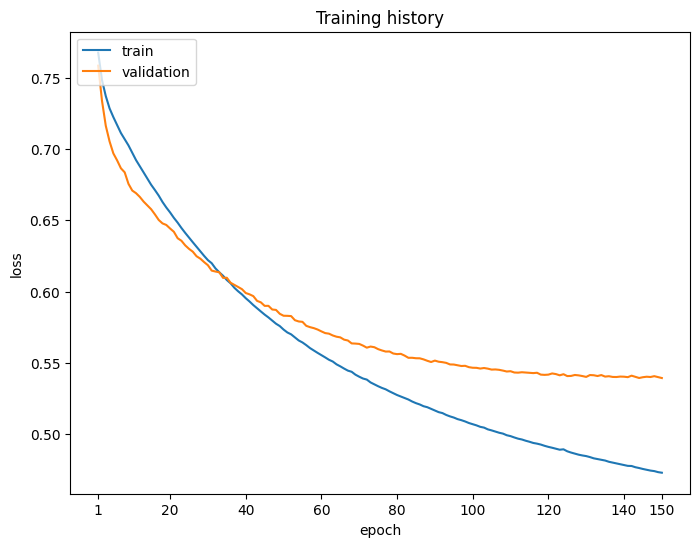

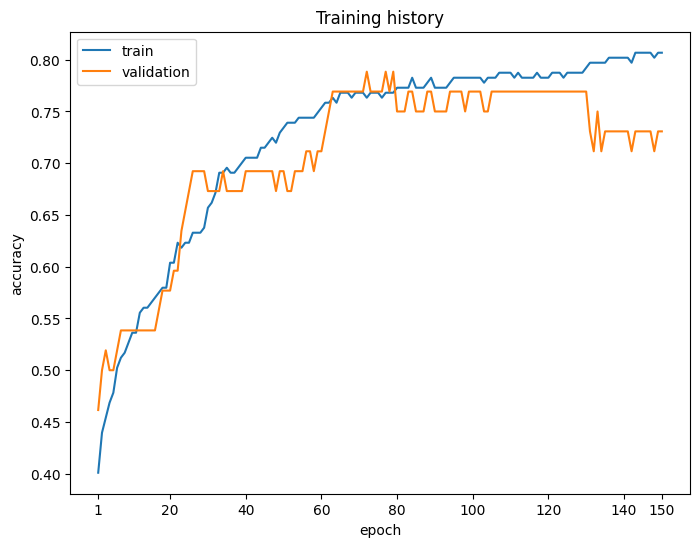

In [7]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [8]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


4/4 [==============================] - 1s 26ms/step


### Prepare Data for evaluation

In [9]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i]
    data.extend(row)
    result_df.loc[len(result_df["INDEX"])] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "MOAB/baseline_nn.csv", encoding="utf-8")